# In Silico Perturbation Analysis

This notebook demonstrates how to perform gene knockout prediction, visualization, and statistical analysis using encapsulated functions.

In [1]:
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
from geneformer_utils import (
    PerturbationAnalyzer,
    complete_perturbation_workflow,
    batch_perturbation_analysis
)


/home/wsg/software/miniconda3/envs/Geneformer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Configuration


In [ ]:
# ====================
# Basic Path Configuration
# ====================
MODEL_PATH = "/home/wsg/SSW/Geneformer/Geneformer-V2-316M/"
TOKEN_DATA_PATH = "/home/wsg/SSW/data/mouse_E9.5_heart/token/mouse_E9p5_heart.dataset/"
# Use preprocessed file with Ensembl IDs
ADATA_PATH = "/home/wsg/SSW/data/mouse_E9.5_heart/token/mouse_E9.5_heart_ensembl_id.h5ad"
OUTPUT_BASE_DIR = "/home/wsg/SSW/data/mouse_E9.5_heart/isp_results"

# ====================
# Spatial Data Configuration
# ====================
SPATIAL_KEY = "aligned_spatial_3D_new"  # Key for 3D coordinates in obsm
REGION_KEY = "heart_regions"  # Key for region annotation in obs (if available)

# ====================
# GPU Configuration
# ====================
GPU_ID = 2  # Set to None to use default GPU


## 1. Load Spatial Transcriptomics Data


In [9]:
print("📂 Loading spatial transcriptomics data...")
adata = sc.read_h5ad(ADATA_PATH)

print(f"✅ Data loaded: {adata.n_obs} cells × {adata.n_vars} genes")
print(f"\nAvailable spatial keys: {list(adata.obsm.keys())}")
print(f"Available annotations: {list(adata.obs.columns)}")


📂 Loading spatial transcriptomics data...
✅ Data loaded: 98966 cells × 16490 genes

Available spatial keys: ['3d_align_spatial', 'aligned_spatial_3D', 'aligned_spatial_3D_mm', 'aligned_spatial_3D_new']
Available annotations: ['ctype_user', 'cml', 'slices', 'heart_anno', 'heart_regions', 'stage', '3d_spatial_density_heart_regions', 'n_genes_by_counts', 'total_counts', 'n_counts', 'filter_pass']


### Example: Nkx2-5 Gene Perturbation Analysis


In [ ]:
# Define target gene
GENE_NAME = "Nkx2-5"  # Mouse gene name (for display)
GENE_ENSEMBL_ID = "ENSG00000183072"  # Corresponding human Ensembl ID

# Run complete analysis workflow
adata_updated, stats_df = complete_perturbation_workflow(
    adata=adata,
    gene_name=GENE_NAME,
    gene_ensembl_id=GENE_ENSEMBL_ID,
    model_path=MODEL_PATH,
    token_data_path=TOKEN_DATA_PATH,
    output_base_dir=OUTPUT_BASE_DIR,
    spatial_key=SPATIAL_KEY,
    region_key=REGION_KEY,
    gpu_id=GPU_ID,
    create_plots=True  # Automatically generate all visualizations
)

print(f"\n✅ Analysis complete! Impact scores added to adata.obs['{GENE_NAME}_Impact']")



🚀 COMPLETE PERTURBATION WORKFLOW: Nkx2-5

🎮 Using GPU 2

🧬 Perturbing gene: Nkx2-5 (ENSG00000183072)

Step 1: Running in silico perturbation...


100%|██████████| 1/1 [00:03<00:00,  3.97s/it]
                                             
100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
                                             
100%|██████████| 1/1 [00:02<00:00,  2.38s/it]
                                             
100%|██████████| 1/1 [00:02<00:00,  2.14s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.91s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.78s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.64s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.50s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.42s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.32s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.27s/it]
                                  

✅ Perturbation complete!

Step 2: Calculating statistics...


100%|██████████| 1/1 [00:00<00:00, 1203.19it/s]


✅ Statistics saved to: /home/wsg/SSW/data/mouse_E9.5_heart/isp_results/Nkx2-5/Nkx2-5_stats/Nkx2-5_stats.csv
   Cells analyzed: 1349

📍 Mapping Nkx2-5 impact to spatial coordinates...
✅ Perfect match! 1349 expressing cells
✅ Impact mapped! Column: 'Nkx2-5_Impact'
   Impact range: [0.000015, 0.000795]

📊 Generating visualizations...
✅ Plot saved to: /home/wsg/SSW/data/mouse_E9.5_heart/isp_results/Nkx2-5/Nkx2-5_impact_3d.html
✅ Plot saved to: /home/wsg/SSW/data/mouse_E9.5_heart/isp_results/Nkx2-5/Nkx2-5_comparison_3d.html
💡 Tip: Click legend items to show/hide cell types in both plots

🏆 Regional Nkx2-5 Dependency Ranking (Mean Impact)
                 count      mean  median       std
Region                                            
Outflow tract     1909  0.000017     0.0  0.000065
Left atrium       5648  0.000006     0.0  0.000025
Right atrium      1538  0.000004     0.0  0.000015
Left ventricle    7291  0.000003     0.0  0.000013
Right ventricle   3394  0.000002     0.0  0.000009


/NFS2_home/NFS2_home_3/wsg/SSW/Geneformer/pipe/geneformer_utils.py:783: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/NFS2_home/NFS2_home_3/wsg/SSW/Geneformer/pipe/geneformer_utils.py:796: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/NFS2_home/NFS2_home_3/wsg/SSW/Geneformer/pipe/geneformer_utils.py:811: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.





✅ Boxplot saved to: /home/wsg/SSW/data/mouse_E9.5_heart/isp_results/Nkx2-5/Nkx2-5_regional_boxplot.pdf

✅ WORKFLOW COMPLETE!
📁 All results saved to: /home/wsg/SSW/data/mouse_E9.5_heart/isp_results/Nkx2-5


✅ Analysis complete! Impact scores added to adata.obs['Nkx2-5_Impact']


### View Statistical Results


In [ ]:
print("=== Perturbation Statistics ===")
print(stats_df.head(10))

# View impact score distribution
impact_col = f"{GENE_NAME}_Impact"
impact_values = adata_updated.obs[impact_col].values

print(f"\n=== Impact Score Distribution ===")
print(f"Cells expressing {GENE_NAME}: {np.sum(impact_values > 0)}")
print(f"Mean impact (expressing cells): {impact_values[impact_values > 0].mean():.6f}")
print(f"Max impact: {impact_values.max():.6f}")


=== Perturbation Statistics ===
   Unnamed: 0  Cosine_sim    Gene
0           0    0.999981  NKX2-5
1           1    0.999968  NKX2-5
2           2    0.999976  NKX2-5
3           3    0.999964  NKX2-5
4           4    0.999966  NKX2-5
5           5    0.999942  NKX2-5
6           6    0.999971  NKX2-5
7           7    0.999981  NKX2-5
8           8    0.999947  NKX2-5
9           9    0.999956  NKX2-5

=== Impact Score Distribution ===
Cells expressing Nkx2-5: 1349
Mean impact (expressing cells): 0.000075
Max impact: 0.000795


In [ ]:
GENES_TO_TEST = [
    ("Nkx2-5", "ENSG00000183072"),
    ("Bmpr2", "ENSG00000168487"),
    ("Tbx5", "ENSG00000089225"),
]

batch_results = batch_perturbation_analysis(
    adata=adata,
    genes_to_test=GENES_TO_TEST,
    model_path=MODEL_PATH,
    token_data_path=TOKEN_DATA_PATH,
    output_base_dir=f"{OUTPUT_BASE_DIR}/batch_analysis",
    spatial_key=SPATIAL_KEY,
    region_key=REGION_KEY,
    gpu_id=GPU_ID
)

print(f"\n✅ Batch analysis complete! {len(batch_results)} genes analyzed.")



🚀 BATCH PERTURBATION ANALYSIS: 3 genes


[1/3] Processing Nkx2-5...

🚀 COMPLETE PERTURBATION WORKFLOW: Nkx2-5

🎮 Using GPU 2

🧬 Perturbing gene: Nkx2-5 (ENSG00000183072)

Step 1: Running in silico perturbation...


100%|██████████| 1/1 [00:04<00:00,  4.10s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.92s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.62s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.52s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.46s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.35s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.30s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.26s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.20s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.16s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.12s/it]
                                  

                                             
100%|██████████| 1/1 [00:00<00:00,  1.46it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  1.54it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  1.55it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  1.59it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  1.65it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  1.67it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  1.72it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  1.79it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  1.81it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  1.90it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,

100%|██████████| 1/1 [00:00<00:00,  3.98it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  9.50it/s]
                                             
100%|██████████| 61/61 [01:37<00:00,  1.61s/it]A


✅ Perturbation complete!

Step 2: Calculating statistics...


100%|██████████| 1/1 [00:00<00:00, 1120.27it/s]


✅ Statistics saved to: /home/wsg/SSW/data/mouse_E11.5_heart/isp_results/batch_analysis/Nkx2-5/Nkx2-5_stats/Nkx2-5_stats.csv
   Cells analyzed: 3021

📍 Mapping Nkx2-5 impact to spatial coordinates...
✅ Perfect match! 3021 expressing cells
✅ Impact mapped! Column: 'Nkx2-5_Impact'
   Impact range: [0.000018, 0.000827]

📊 Generating visualizations...
✅ Plot saved to: /home/wsg/SSW/data/mouse_E11.5_heart/isp_results/batch_analysis/Nkx2-5/Nkx2-5_impact_3d.html
✅ Plot saved to: /home/wsg/SSW/data/mouse_E11.5_heart/isp_results/batch_analysis/Nkx2-5/Nkx2-5_comparison_3d.html
💡 Tip: Click legend items to show/hide cell types in both plots

🏆 Regional Nkx2-5 Dependency Ranking (Mean Impact)
                 count      mean  median       std
Region                                            
Left atrium      11554  0.000005     0.0  0.000030
Outflow tract     8340  0.000003     0.0  0.000018
Right atrium     14967  0.000002     0.0  0.000018
Right ventricle  32652  0.000002     0.0  0.000013
Left 

/NFS2_home/NFS2_home_3/wsg/SSW/Geneformer/pipe/geneformer_utils.py:783: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/NFS2_home/NFS2_home_3/wsg/SSW/Geneformer/pipe/geneformer_utils.py:796: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/NFS2_home/NFS2_home_3/wsg/SSW/Geneformer/pipe/geneformer_utils.py:811: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.





✅ Boxplot saved to: /home/wsg/SSW/data/mouse_E11.5_heart/isp_results/batch_analysis/Nkx2-5/Nkx2-5_regional_boxplot.pdf

✅ WORKFLOW COMPLETE!
📁 All results saved to: /home/wsg/SSW/data/mouse_E11.5_heart/isp_results/batch_analysis/Nkx2-5

✅ Nkx2-5 complete!

[2/3] Processing Bmpr2...

🚀 COMPLETE PERTURBATION WORKFLOW: Bmpr2

🎮 Using GPU 2

🧬 Perturbing gene: Bmpr2 (ENSG00000168487)

Step 1: Running in silico perturbation...


100%|██████████| 1/1 [00:03<00:00,  3.40s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.68s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.47s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.29s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.20s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.12s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.06s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.01s/it]
                                             
100%|██████████| 1/1 [00:00<00:00,  1.07it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  1.10it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  1.17it/s]
                                  

                                             
100%|██████████| 1/1 [00:00<00:00,  3.26it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  3.61it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  4.76it/s]
                                             
100%|██████████| 33/33 [00:53<00:00,  1.62s/it]A


✅ Perturbation complete!

Step 2: Calculating statistics...


100%|██████████| 1/1 [00:00<00:00, 1452.82it/s]


✅ Statistics saved to: /home/wsg/SSW/data/mouse_E11.5_heart/isp_results/batch_analysis/Bmpr2/Bmpr2_stats/Bmpr2_stats.csv
   Cells analyzed: 1642

📍 Mapping Bmpr2 impact to spatial coordinates...
✅ Perfect match! 1642 expressing cells
✅ Impact mapped! Column: 'Bmpr2_Impact'
   Impact range: [0.000022, 0.002000]

📊 Generating visualizations...
✅ Plot saved to: /home/wsg/SSW/data/mouse_E11.5_heart/isp_results/batch_analysis/Bmpr2/Bmpr2_impact_3d.html
✅ Plot saved to: /home/wsg/SSW/data/mouse_E11.5_heart/isp_results/batch_analysis/Bmpr2/Bmpr2_comparison_3d.html
💡 Tip: Click legend items to show/hide cell types in both plots

🏆 Regional Bmpr2 Dependency Ranking (Mean Impact)
                 count          mean  median       std
Region                                                
Left atrium      11554  2.571847e-06     0.0  0.000027
Outflow tract     8340  1.854348e-06     0.0  0.000019
Right atrium     14967  1.493740e-06     0.0  0.000013
Right ventricle  32652  1.094052e-06     0.0  

/NFS2_home/NFS2_home_3/wsg/SSW/Geneformer/pipe/geneformer_utils.py:783: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/NFS2_home/NFS2_home_3/wsg/SSW/Geneformer/pipe/geneformer_utils.py:796: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/NFS2_home/NFS2_home_3/wsg/SSW/Geneformer/pipe/geneformer_utils.py:811: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.





✅ Boxplot saved to: /home/wsg/SSW/data/mouse_E11.5_heart/isp_results/batch_analysis/Bmpr2/Bmpr2_regional_boxplot.pdf

✅ WORKFLOW COMPLETE!
📁 All results saved to: /home/wsg/SSW/data/mouse_E11.5_heart/isp_results/batch_analysis/Bmpr2

✅ Bmpr2 complete!

[3/3] Processing Tbx5...

🚀 COMPLETE PERTURBATION WORKFLOW: Tbx5

🎮 Using GPU 2

🧬 Perturbing gene: Tbx5 (ENSG00000089225)

Step 1: Running in silico perturbation...


100%|██████████| 1/1 [00:03<00:00,  3.94s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.61s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.33s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.20s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.08s/it]
                                             
100%|██████████| 1/1 [00:01<00:00,  1.01s/it]
                                             
100%|██████████| 1/1 [00:00<00:00,  1.07it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  1.14it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  1.19it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  1.29it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  1.35it/s]
                                  

✅ Perturbation complete!

Step 2: Calculating statistics...


100%|██████████| 1/1 [00:00<00:00, 1145.98it/s]


✅ Statistics saved to: /home/wsg/SSW/data/mouse_E11.5_heart/isp_results/batch_analysis/Tbx5/Tbx5_stats/Tbx5_stats.csv
   Cells analyzed: 1329

📍 Mapping Tbx5 impact to spatial coordinates...
✅ Perfect match! 1329 expressing cells
✅ Impact mapped! Column: 'Tbx5_Impact'
   Impact range: [0.000015, 0.001244]

📊 Generating visualizations...
✅ Plot saved to: /home/wsg/SSW/data/mouse_E11.5_heart/isp_results/batch_analysis/Tbx5/Tbx5_impact_3d.html
✅ Plot saved to: /home/wsg/SSW/data/mouse_E11.5_heart/isp_results/batch_analysis/Tbx5/Tbx5_comparison_3d.html
💡 Tip: Click legend items to show/hide cell types in both plots

🏆 Regional Tbx5 Dependency Ranking (Mean Impact)
                 count          mean  median       std
Region                                                
Left atrium      11554  3.359785e-06     0.0  0.000025
Right atrium     14967  1.690881e-06     0.0  0.000014
Left ventricle   31453  7.595030e-07     0.0  0.000010
Right ventricle  32652  4.101899e-07     0.0  0.000007
O

/NFS2_home/NFS2_home_3/wsg/SSW/Geneformer/pipe/geneformer_utils.py:783: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/NFS2_home/NFS2_home_3/wsg/SSW/Geneformer/pipe/geneformer_utils.py:796: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/NFS2_home/NFS2_home_3/wsg/SSW/Geneformer/pipe/geneformer_utils.py:811: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.





✅ Boxplot saved to: /home/wsg/SSW/data/mouse_E11.5_heart/isp_results/batch_analysis/Tbx5/Tbx5_regional_boxplot.pdf

✅ WORKFLOW COMPLETE!
📁 All results saved to: /home/wsg/SSW/data/mouse_E11.5_heart/isp_results/batch_analysis/Tbx5

✅ Tbx5 complete!

✅ BATCH ANALYSIS COMPLETE! 3/3 genes successful


✅ Batch analysis complete! 3 genes analyzed.


### Compare Regional Impact Across Multiple Genes


/tmp/ipykernel_3989857/1108813563.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



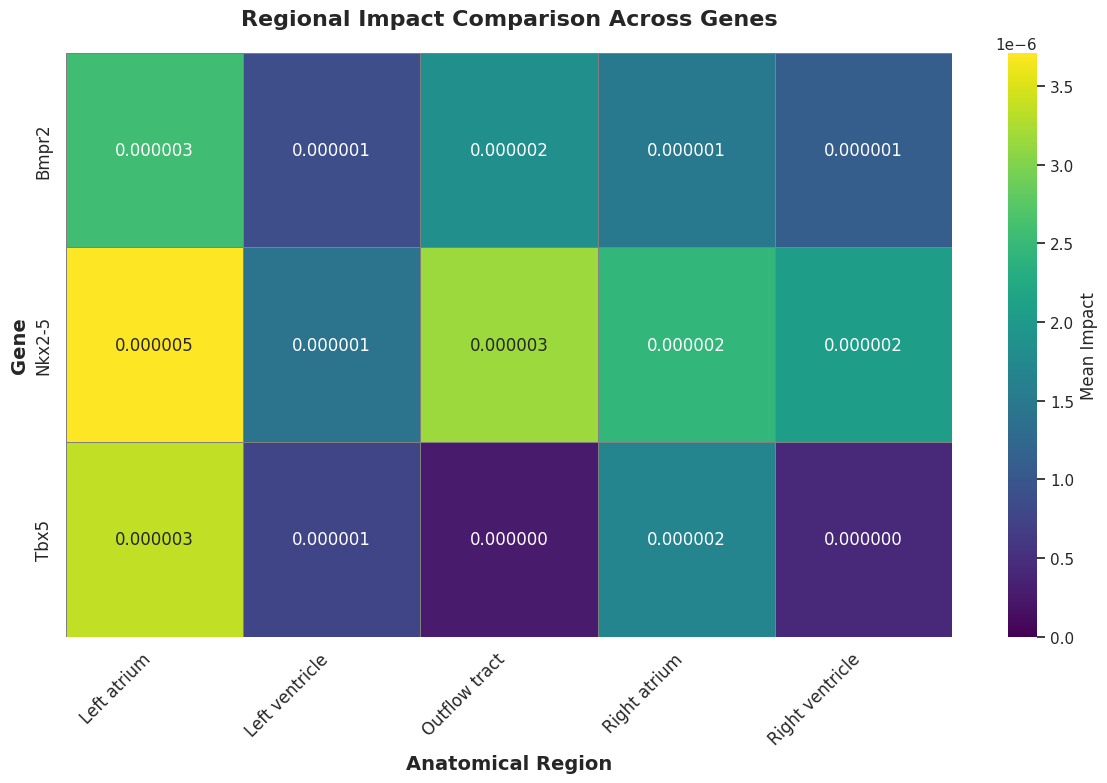


=== Gene-Region Impact Matrix ===
Region  Left atrium  Left ventricle  Outflow tract  Right atrium  \
Gene                                                               
Bmpr2      0.000003    8.784546e-07   1.854348e-06      0.000001   
Nkx2-5     0.000005    1.417707e-06   3.159697e-06      0.000002   
Tbx5       0.000003    7.595030e-07   2.684353e-07      0.000002   

Region  Right ventricle  
Gene                     
Bmpr2      1.094052e-06  
Nkx2-5     2.058339e-06  
Tbx5       4.101899e-07  

Impact value range: [0.000000, 0.000004]


In [ ]:
import pandas as pd
import seaborn as sns

summary_data = []

for gene_name, (adata_result, stats_df) in batch_results.items():
    impact_col = f"{gene_name}_Impact"
    
    df_temp = pd.DataFrame({
        'Gene': gene_name,
        'Region': adata_result.obs[REGION_KEY],
        'Impact': adata_result.obs[impact_col]
    })
    
    summary_data.append(df_temp)

df_combined = pd.concat(summary_data, ignore_index=True)

df_pivot = df_combined.groupby(['Gene', 'Region'])['Impact'].mean().unstack(fill_value=0)

impact_values = df_pivot.values.flatten()
impact_positive = impact_values[impact_values > 0]
if len(impact_positive) > 0:
    vmin = 0
    vmax = np.percentile(impact_positive, 95)
else:
    vmin, vmax = df_pivot.min().min(), df_pivot.max().max()

plt.figure(figsize=(10, 6))
sns.set_style("white")

sns.heatmap(
    df_pivot, 
    annot=True, 
    fmt='.6f',
    cmap='viridis',
    vmin=vmin,
    vmax=vmax,
    cbar_kws={'label': 'Mean Impact', 'shrink': 0.8},
    linewidths=0.5,
    linecolor='gray',
    annot_kws={'fontsize': 9}
)

plt.title("Regional Impact Comparison Across Genes", fontsize=12, fontweight='bold', pad=15)
plt.xlabel("Heart Region", fontsize=11, fontweight='bold')
plt.ylabel("Gene", fontsize=11, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{OUTPUT_BASE_DIR}/batch_analysis/multi_gene_heatmap.png", dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\n=== Gene-Region Impact Matrix ===")
print(df_pivot)
print(f"\nImpact value range: [{vmin:.6f}, {vmax:.6f}]")
